In [15]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import os
import torch.optim as optim
import torch.nn.init as init
from collections import Counter
os.environ["CUDA_VISIBLE_DEVICES"] = '0'
import pickle

In [2]:
def sample_data():
    count = 10000
    rand = np.random.RandomState(0)
    a = 0.3 + 0.1 * rand.randn(count)
    b = 0.8 + 0.05 * rand.randn(count)
    mask = rand.rand(count) < 0.5
    samples = np.clip(a * mask + b * (1 - mask), 0.0, 1.0)
    return np.digitize(samples, np.linspace(0.0, 1.0, 100))

In [3]:
X = sample_data()
np.random.shuffle(X)
X_train = torch.Tensor(X[:6000]).int().cuda()
X_val = torch.Tensor(X[6000:8000]).int().cuda()
X_test = torch.Tensor(X[8000:]).int().cuda()

In [4]:
theta = torch.zeros([100])
theta.requires_grad = True
theta_optimizer = optim.SGD([theta], lr=10.0)

In [5]:
def get_NLL(prob):
    return -torch.mean(torch.log2(prob))

In [6]:
train_log = []
val_log = []
min_nll_val = np.inf
best_theta = theta
for i in range(1000):
    prob = torch.softmax(theta, dim=0)[X_train.long()]
#     loss = torch.sum(-torch.log(prob))
    loss = torch.mean(-torch.log(prob))
    
    theta_optimizer.zero_grad()
    loss.backward()
    theta_optimizer.step()
    
    train_prob = torch.softmax(theta, dim=0)[X_train.long()]
    nll_train = get_NLL(train_prob)
    train_log.append(nll_train.item())
    
    val_prob = torch.softmax(theta, dim=0)[X_val.long()]
    nll_val = get_NLL(val_prob)
    val_log.append(nll_val.item())
    if (nll_val < min_nll_val):
        min_nll_val = nll_val
        best_theta = theta.clone()
    print("Epoch-{:d} loss: {:.4f}, train_bits: {:.3f}, val_bits: {:.3f}".format(i + 1, loss, nll_train, nll_val))

Epoch-1 loss: 4.6052, train_bits: 6.473, val_bits: 6.485
Epoch-2 loss: 4.4866, train_bits: 6.338, val_bits: 6.361
Epoch-3 loss: 4.3929, train_bits: 6.234, val_bits: 6.267
Epoch-4 loss: 4.3210, train_bits: 6.156, val_bits: 6.197
Epoch-5 loss: 4.2671, train_bits: 6.098, val_bits: 6.145
Epoch-6 loss: 4.2267, train_bits: 6.054, val_bits: 6.106
Epoch-7 loss: 4.1963, train_bits: 6.020, val_bits: 6.077
Epoch-8 loss: 4.1728, train_bits: 5.993, val_bits: 6.054
Epoch-9 loss: 4.1544, train_bits: 5.972, val_bits: 6.035
Epoch-10 loss: 4.1395, train_bits: 5.954, val_bits: 6.020
Epoch-11 loss: 4.1272, train_bits: 5.939, val_bits: 6.007
Epoch-12 loss: 4.1169, train_bits: 5.927, val_bits: 5.996
Epoch-13 loss: 4.1081, train_bits: 5.916, val_bits: 5.986
Epoch-14 loss: 4.1006, train_bits: 5.907, val_bits: 5.978
Epoch-15 loss: 4.0941, train_bits: 5.898, val_bits: 5.971
Epoch-16 loss: 4.0884, train_bits: 5.891, val_bits: 5.965
Epoch-17 loss: 4.0834, train_bits: 5.885, val_bits: 5.959
Epoch-18 loss: 4.0789, 

Epoch-182 loss: 4.0186, train_bits: 5.798, val_bits: 5.886
Epoch-183 loss: 4.0186, train_bits: 5.798, val_bits: 5.886
Epoch-184 loss: 4.0185, train_bits: 5.797, val_bits: 5.886
Epoch-185 loss: 4.0185, train_bits: 5.797, val_bits: 5.886
Epoch-186 loss: 4.0185, train_bits: 5.797, val_bits: 5.886
Epoch-187 loss: 4.0185, train_bits: 5.797, val_bits: 5.886
Epoch-188 loss: 4.0184, train_bits: 5.797, val_bits: 5.886
Epoch-189 loss: 4.0184, train_bits: 5.797, val_bits: 5.886
Epoch-190 loss: 4.0184, train_bits: 5.797, val_bits: 5.886
Epoch-191 loss: 4.0184, train_bits: 5.797, val_bits: 5.886
Epoch-192 loss: 4.0184, train_bits: 5.797, val_bits: 5.886
Epoch-193 loss: 4.0183, train_bits: 5.797, val_bits: 5.886
Epoch-194 loss: 4.0183, train_bits: 5.797, val_bits: 5.886
Epoch-195 loss: 4.0183, train_bits: 5.797, val_bits: 5.886
Epoch-196 loss: 4.0183, train_bits: 5.797, val_bits: 5.886
Epoch-197 loss: 4.0183, train_bits: 5.797, val_bits: 5.886
Epoch-198 loss: 4.0182, train_bits: 5.797, val_bits: 5.8

Epoch-365 loss: 4.0167, train_bits: 5.795, val_bits: 5.885
Epoch-366 loss: 4.0167, train_bits: 5.795, val_bits: 5.885
Epoch-367 loss: 4.0167, train_bits: 5.795, val_bits: 5.885
Epoch-368 loss: 4.0167, train_bits: 5.795, val_bits: 5.885
Epoch-369 loss: 4.0167, train_bits: 5.795, val_bits: 5.885
Epoch-370 loss: 4.0167, train_bits: 5.795, val_bits: 5.885
Epoch-371 loss: 4.0167, train_bits: 5.795, val_bits: 5.885
Epoch-372 loss: 4.0167, train_bits: 5.795, val_bits: 5.885
Epoch-373 loss: 4.0167, train_bits: 5.795, val_bits: 5.885
Epoch-374 loss: 4.0167, train_bits: 5.795, val_bits: 5.885
Epoch-375 loss: 4.0167, train_bits: 5.795, val_bits: 5.885
Epoch-376 loss: 4.0167, train_bits: 5.795, val_bits: 5.885
Epoch-377 loss: 4.0167, train_bits: 5.795, val_bits: 5.885
Epoch-378 loss: 4.0166, train_bits: 5.795, val_bits: 5.885
Epoch-379 loss: 4.0166, train_bits: 5.795, val_bits: 5.885
Epoch-380 loss: 4.0166, train_bits: 5.795, val_bits: 5.885
Epoch-381 loss: 4.0166, train_bits: 5.795, val_bits: 5.8

Epoch-539 loss: 4.0162, train_bits: 5.794, val_bits: 5.884
Epoch-540 loss: 4.0162, train_bits: 5.794, val_bits: 5.884
Epoch-541 loss: 4.0162, train_bits: 5.794, val_bits: 5.884
Epoch-542 loss: 4.0162, train_bits: 5.794, val_bits: 5.884
Epoch-543 loss: 4.0162, train_bits: 5.794, val_bits: 5.884
Epoch-544 loss: 4.0162, train_bits: 5.794, val_bits: 5.884
Epoch-545 loss: 4.0162, train_bits: 5.794, val_bits: 5.884
Epoch-546 loss: 4.0162, train_bits: 5.794, val_bits: 5.884
Epoch-547 loss: 4.0162, train_bits: 5.794, val_bits: 5.884
Epoch-548 loss: 4.0162, train_bits: 5.794, val_bits: 5.884
Epoch-549 loss: 4.0162, train_bits: 5.794, val_bits: 5.884
Epoch-550 loss: 4.0162, train_bits: 5.794, val_bits: 5.884
Epoch-551 loss: 4.0162, train_bits: 5.794, val_bits: 5.884
Epoch-552 loss: 4.0162, train_bits: 5.794, val_bits: 5.884
Epoch-553 loss: 4.0162, train_bits: 5.794, val_bits: 5.884
Epoch-554 loss: 4.0162, train_bits: 5.794, val_bits: 5.884
Epoch-555 loss: 4.0162, train_bits: 5.794, val_bits: 5.8

Epoch-687 loss: 4.0160, train_bits: 5.794, val_bits: 5.885
Epoch-688 loss: 4.0160, train_bits: 5.794, val_bits: 5.885
Epoch-689 loss: 4.0160, train_bits: 5.794, val_bits: 5.885
Epoch-690 loss: 4.0160, train_bits: 5.794, val_bits: 5.885
Epoch-691 loss: 4.0160, train_bits: 5.794, val_bits: 5.885
Epoch-692 loss: 4.0160, train_bits: 5.794, val_bits: 5.885
Epoch-693 loss: 4.0160, train_bits: 5.794, val_bits: 5.885
Epoch-694 loss: 4.0160, train_bits: 5.794, val_bits: 5.885
Epoch-695 loss: 4.0160, train_bits: 5.794, val_bits: 5.885
Epoch-696 loss: 4.0160, train_bits: 5.794, val_bits: 5.885
Epoch-697 loss: 4.0160, train_bits: 5.794, val_bits: 5.885
Epoch-698 loss: 4.0160, train_bits: 5.794, val_bits: 5.885
Epoch-699 loss: 4.0160, train_bits: 5.794, val_bits: 5.885
Epoch-700 loss: 4.0160, train_bits: 5.794, val_bits: 5.885
Epoch-701 loss: 4.0160, train_bits: 5.794, val_bits: 5.885
Epoch-702 loss: 4.0160, train_bits: 5.794, val_bits: 5.885
Epoch-703 loss: 4.0160, train_bits: 5.794, val_bits: 5.8

Epoch-872 loss: 4.0159, train_bits: 5.794, val_bits: 5.885
Epoch-873 loss: 4.0159, train_bits: 5.794, val_bits: 5.885
Epoch-874 loss: 4.0159, train_bits: 5.794, val_bits: 5.885
Epoch-875 loss: 4.0159, train_bits: 5.794, val_bits: 5.885
Epoch-876 loss: 4.0159, train_bits: 5.794, val_bits: 5.885
Epoch-877 loss: 4.0159, train_bits: 5.794, val_bits: 5.885
Epoch-878 loss: 4.0159, train_bits: 5.794, val_bits: 5.885
Epoch-879 loss: 4.0159, train_bits: 5.794, val_bits: 5.885
Epoch-880 loss: 4.0159, train_bits: 5.794, val_bits: 5.885
Epoch-881 loss: 4.0159, train_bits: 5.794, val_bits: 5.885
Epoch-882 loss: 4.0159, train_bits: 5.794, val_bits: 5.885
Epoch-883 loss: 4.0159, train_bits: 5.794, val_bits: 5.885
Epoch-884 loss: 4.0159, train_bits: 5.794, val_bits: 5.885
Epoch-885 loss: 4.0159, train_bits: 5.794, val_bits: 5.885
Epoch-886 loss: 4.0159, train_bits: 5.794, val_bits: 5.885
Epoch-887 loss: 4.0159, train_bits: 5.794, val_bits: 5.885
Epoch-888 loss: 4.0159, train_bits: 5.794, val_bits: 5.8

<IPython.core.display.Javascript object>


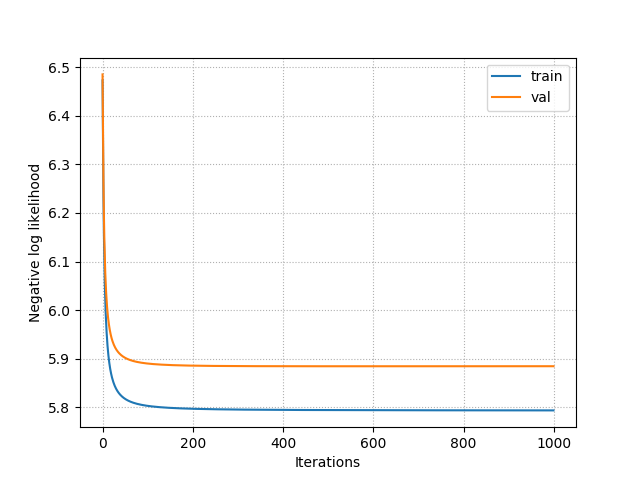

In [16]:
plt.plot(list(range(len(train_log))), train_log, label='train')
plt.plot(list(range(len(val_log))), val_log, label='val')
plt.legend()
plt.xlabel("Iterations")
plt.ylabel("Negative log likelihood")
plt.grid(linestyle=':')

In [10]:
test_prob = torch.softmax(best_theta, dim=0)[X_test.long()]
nll_test = get_NLL(test_prob)
print("Test NLL: {:.3f} bits".format(nll_test))

Test NLL: 5.869 bits


<IPython.core.display.Javascript object>


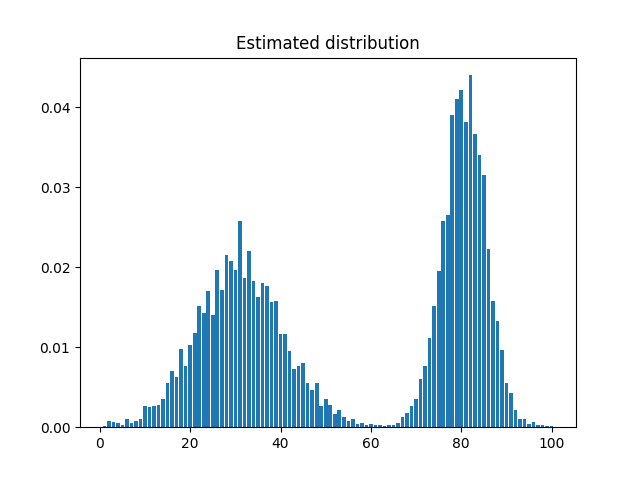

Text(0.5, 1.0, 'Estimated distribution')

In [9]:
prob = torch.softmax(best_theta, dim=0).cpu().data.numpy()
plt.bar(np.arange(1, len(prob) + 1), prob)
plt.title("Estimated distribution")

<IPython.core.display.Javascript object>


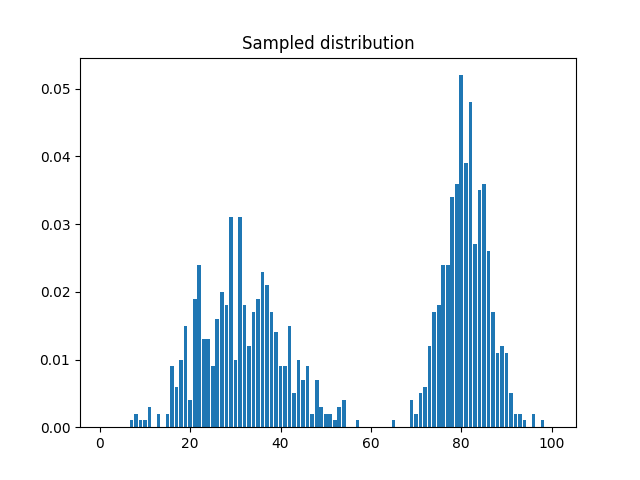

Text(0.5, 1.0, 'Sampled distribution')

In [11]:
samples = np.random.choice(np.arange(1, 101), p=prob, size=[1000])
from collections import Counter
c = Counter(samples)
freq = []
for i in np.arange(1, 101):
    freq.append(c[i] / 1000)
plt.bar(np.arange(1, 101), freq)
plt.title("Sampled distribution")

<IPython.core.display.Javascript object>


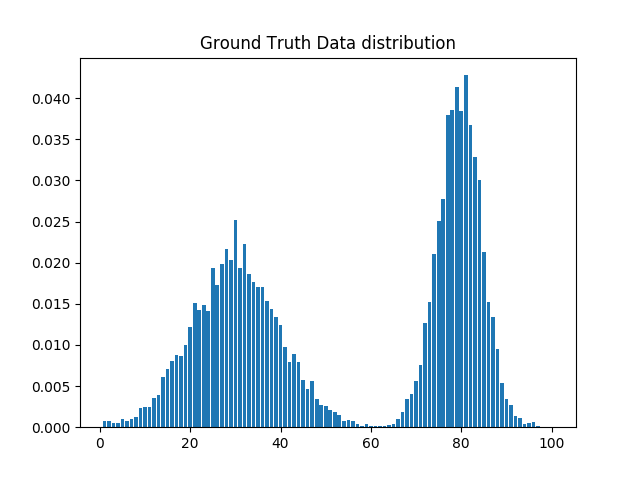

Text(0.5, 1.0, 'Ground Truth Data distribution')

In [14]:
c = Counter(X)
freq = []
for i in np.arange(1, 101):
    freq.append(c[i] / 10000)
plt.bar(np.arange(1, 101), freq)
plt.title("Ground Truth Data distribution")